In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
# read the dataset
dataset = pd.read_excel('../../DataSet/Telco_customer_churn.xlsx')

In [4]:
dataset.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

## Clean and Prepare the data

In [5]:
# taking only the required columns which are Contract and Churn Value
dataset = dataset[['Contract','Churn Value']]

In [6]:
# checking for null values
dataset.isnull().sum()

Contract       0
Churn Value    0
dtype: int64

In [7]:
dataset.dtypes

Contract       object
Churn Value     int64
dtype: object

<AxesSubplot:xlabel='Contract', ylabel='count'>

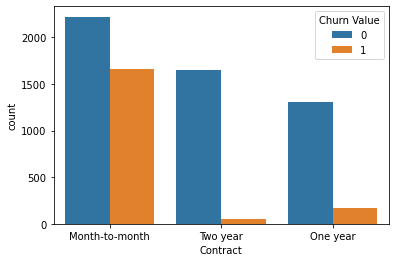

In [8]:
# visualizing the distribution of all contract types vs churn value
sns.countplot(x='Contract', hue='Churn Value', data=dataset)

### Obviously customers with Month-to-Month contracts have the highest churn rate.But let's test that with Hypothesis testing

## First making sure the population is normally distributed

In [10]:
# make sure that the Contract column is normaly distributed
dataset['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

## Defining the Hypothesises
**1.  customers with contracts of type Month-to-Month more likely to churn**

**2. Null Hypothesis H0: customers with contracts of type Month-to-Month have churn rate less than or equal to those with contracts one year and two year (H0: P_Month = P_1Year = P_2Year)**

**3. Alternative Hypothesis H1: customers with contracts of type Month-to-Month have churn rate larger than those with contracts one year and two year (H1: P_Month > (P_1Year & P_2Year))**

## Taking a sample

In [21]:
# take a stratified sample of the dataset
sample_size = 2000
stratified_sample = dataset.groupby('Contract', group_keys=False).apply(lambda x: x.sample(int(len(x) * sample_size/len(dataset))))

In [28]:
stratified_sample['Contract'].value_counts()

Month-to-month    1100
Two year           481
One year           418
Name: Contract, dtype: int64

In [29]:
month_group = stratified_sample[stratified_sample['Contract'] == 'Month-to-month']
one_year_group = stratified_sample[stratified_sample['Contract'] == 'One year']
two_year_group = stratified_sample[stratified_sample['Contract'] == 'Two year']